<a href="https://colab.research.google.com/github/t1seo/AIFFEL/blob/master/FUNDAMENTALS/16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16. 선형 회귀와 로지스틱 회귀

## 16-1. 회귀(Regression)에 대하여

### 회귀분석이란?
**회귀분석(Regression Analysis)**이란 관찰된 여러 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법이다.

**회귀 분석으로 풀 수 있는 문제**
- 부모의 키와 자식의 키 사이의 관계
- 자동차의 스펙을 이용한 가격 예측
- 1인당 국민 총소득과 배기가스 배출량 사이의 관계 예측

위에서 제시된 문제는 모두 **독립변수(independent variable)**와 **종속변수(dependent variable)** 사이의 상호 관련성을 규명하는 것들이다. 독립변수와 종속변수는 각각 **설명변수(explanatory variable)**, **반영변수(reponsible variable)**라보 불리기도 한다.




**회귀(Regression)**라는 개념을 처음 제시한 사람은 영국의 우생학자 F.Galton(1822~1911)이다.

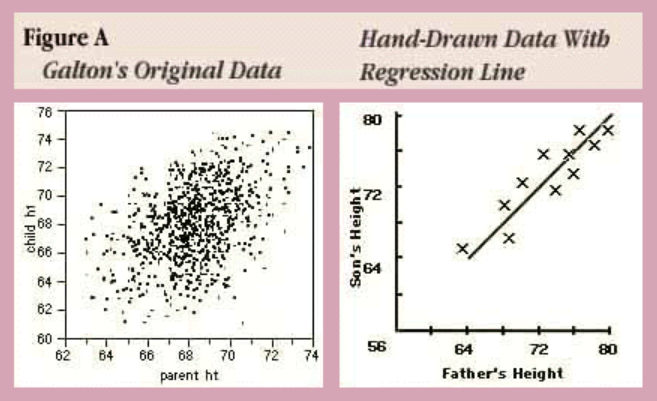

Galton은 아버지의 키 $x$와 자식의 키 $y$ 사이의 직선 형태의 기울기가 1보다 작다는 것에 주목하였는데, 이것은 세대를 거듭할수록 아버지의 키가 크든 작든 무관하게 자식의 키는 전체 평균에 수렴하게 된다는 것을 의미한다.

그래서 그는 통계적으로 평균으로 회귀(regression)한다는 뜻에서 회귀(Regression)라는 개념을 처음 제시한 것이었다고한다.

하지만 오늘날 회귀분석이란 단순히 평균으로 수렴하는 현상을 넘어서서, 두 개 이상의 변수 사이의 함수관계를 추구하는 통계적 방법을 의미하게 된다.

위 그림에서 본 것처럼 두 변수 사이의 관계를 직선 형태로 가정하고 분석하는 것을 **선형 회귀분석(Linear Regression)**이라고 한다.

선형 회귀분석은 간단하면서도 실생활에 적용되는 경우가 정말 많기 때문에 선형 회귀분석의 기본 가정 내에 문제가 들어온다면 일단 먼저 회귀 분석을 시도해볼 만큼 문제를 해결할 때 많이 이용하게 되는 보편적인 방식이다.

- [선형 회귀분석의 4가지 기본가정](https://kkokkilkon.tistory.com/175)
    - 선형성
    - 독립성
    - 등분상성
    - 정규성



- [선형 회귀 모델에서 선형성](https://brunch.co.kr/@gimmesilver/18)
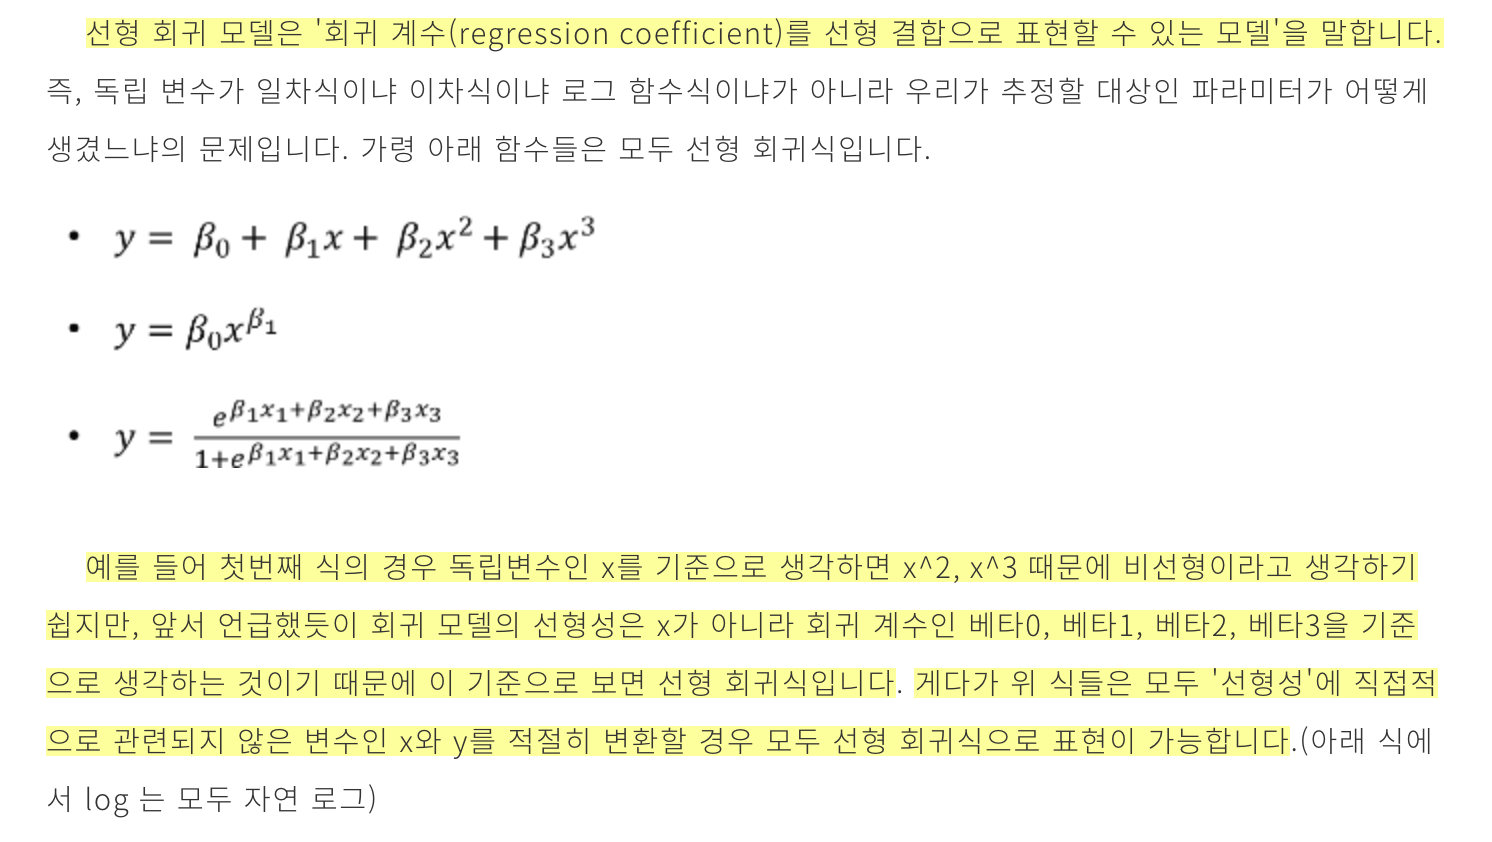

### 지도학습의 두 종류: 분류와 회귀
- 분류 : 데이터 xx의 여러 feature 값들을 이용하여 해당 데이터의 클래스 $y$를 추론하는 것
- 회귀 : 데이터 xx의 여러 feature 값들을 이용하여 연관된 다른 데이터 $y$의 정확한 값을 추론하는 것

## 16-2. 선형 회귀 분석(Linear Regression)



### 1. 선형 회귀 모델링
**선형 회귀(linear regression)**은 종속변수 Y와 한 개 이상의 독립변수 X와의 선형 상관관계를 모델링하는 회귀분석 기법이다.

$$y = \beta x + \epsilon$$

- 여기서 $\beta$는 **회귀계수**라고 불리며, $\epsilon$은 종속 변수와 독립 변수 사이에 **오차**를 의미한다. 이들은 우리가 데이터로부터 추정해야 하는 **파라미터**가 된다.
- 결국 우리는 $x$와 $y$에 해당하는 데이터가 있을 때, 이러한 데이터로부터 $\beta$와 $\epsilon$를 추정한 후 추정한 값들을 바탕으로 모델링을 수행한다. 
- 그 다음 해당 모델을 기반으로 새로운 데이터의 $x$ 값들을 입력으로 넣어주었을 떄, 그에 해당하는 $y$ 값을 추론하게 되는 것이다. 
- 결국 선형회귀 모델을 찾는다는 것은 주어진 데이터에 우리의 선형 식이 잘 맞도록 회귀계수 및 오차를 구하는 것을 의미한다.

### 2. 머신러닝에서의 선형회귀모델 표기법
위에서 표현했던 선형회귀 모델을 머신러닝 기반의 방법에서는 조금 다른 변수값을 써서 표현한다.
$$H = Wx + b$$

- $H$를 **가정(Hypothesis)**, $W$를 **가중치(Weight)**, $b$를 **편향(bias)**로 명명한다. 
- 머신러닝 혹은 딥런이 기법을 잉요해서 회귀 모델을 구한다는 의미는 주어진 데이터를 이용하여 $W$와 $b$를 구한다는 의미이다.
- 위의 회귀 모델에서의 회귀계수 $\beta$ 값이 $W$, 에러 값이 $b$에 해당하는 것이다.
- 대부분의 $W$, $b$는 단순 스칼라 값이 아닌 고차원의 행렬(matrix) 형태를 띄고 있는 경우가 많고, 이 파라미터의 개수가 많을 수록 모델이 크기는 커지고 학습하는 것은 어렵다.



### 3. 용어 설명
**잔차(Residuals)**란 **회귀모델을 이용해 추정한 값과 실제 데이터의 차이**를 의미한다.

**최소제곱법**은 이 잔차를 이용하여 주어진 점 데이터들을 가장 잘 설명하는 회귀모델을 찾는 가장 대표적인 방법 중 하나이다.
$$argmin_{W, b}(\sum_{i = 1}^{n}{residuals}^2)$$
즉, **n개의 점 데이터에 대하여 잔차의 제곱의 합을 최소로 하는 W, b를 구하는 방법이다.**

머신러닝에서는 최소제곱법과 같은 회귀계수를 구하는 과정에 쓰는 함수를 **손실함수(Loss function)**이라고 한다.

또한 회귀 모델이 잘 결정되었는지 확인할 때 참고하는 지표로 **결정계수**(**R-squared**, 또는 **R2 score** 등으로 표기)가 있다. 이는 0에서 1 사이의 값으로 나타나는데, 1에 가까울수록 해당 회귀모델이 데이털르 잘 표현한다고 볼 수 있다.



### 4. 데이터셋 준비하기(Boston house prices dataset)

In [1]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']

x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names']) # dataframe으로 변환
print(f"boston dataset의 차원: {data.shape}")
print(f"price의 차원: {price.shape}")
print(f"boston train dataset의 차원: {x_train.shape}")
print(f"boston test dataset의 차원: {x_test.shape}")

df.head()

boston dataset의 차원: (506, 13)
price의 차원: (506,)
boston train dataset의 차원: (404, 13)
boston test dataset의 차원: (102, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11
1,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
3,0.10612,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
4,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,348.93,29.55


In [2]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 5. Boston Dataset에서 Linear Regression 적용해보기

In [3]:
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

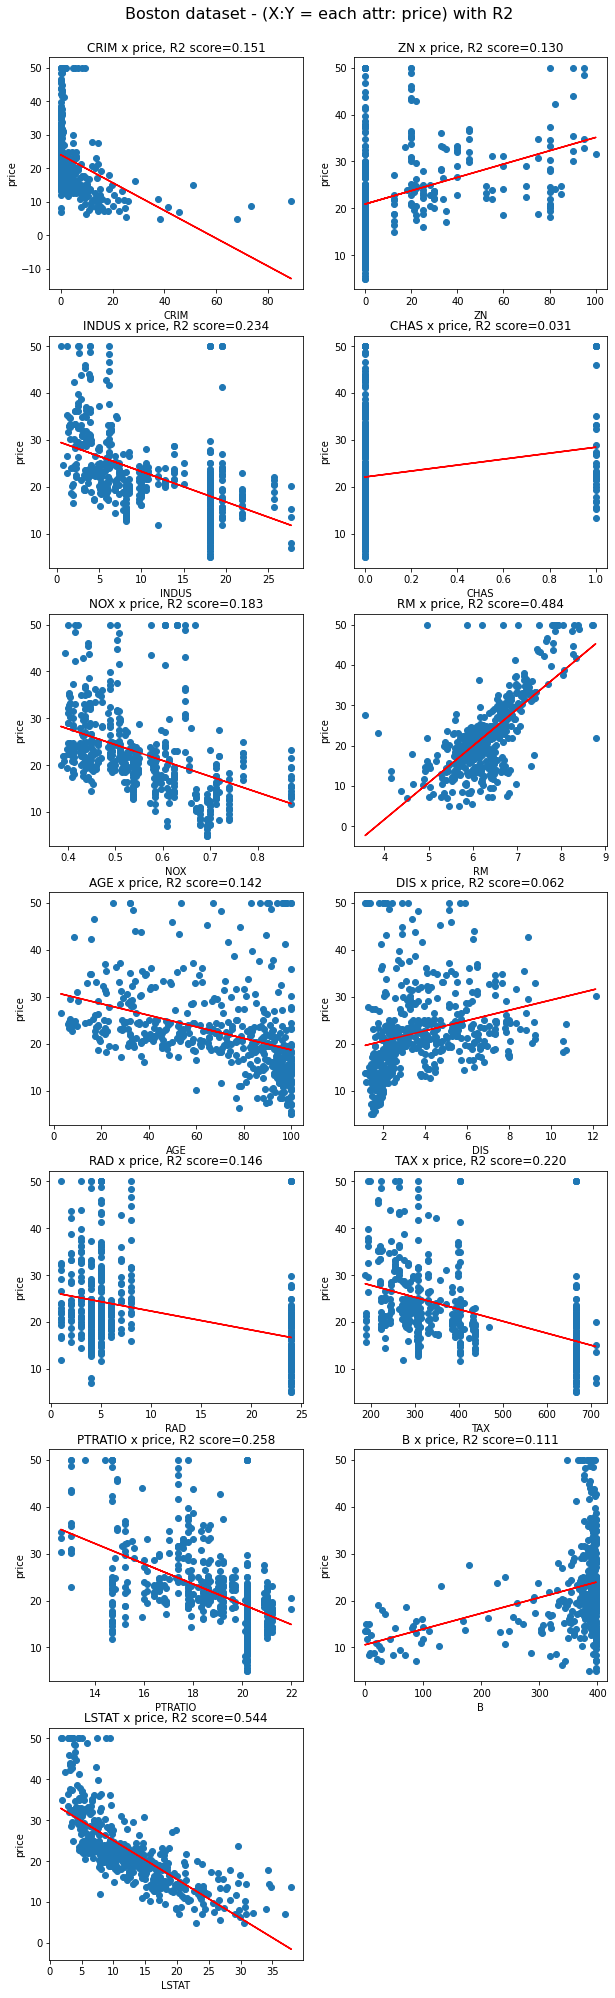

In [4]:
fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번쨰 attribute(column)을 살펴본다
    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름

    lr = LinearRegression() # Linaer Regression Model
    lr.fit(single_attr, price) # 단일 컬럼 데이터로 학습
    pred_price = lr.predict(single_attr) # 예측값
    score = metrics.r2_score(price, pred_price)  # 결정 계수 구하는 함수

    # 캔버스 todjtd
    ax = fig.add_subplot(7, 2, i + 1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

### 6. 경사 하강법(Gradient Descent Algorithm)
머신러닝에서는 가중치의 그레디언트(미분값)가 최소가 되는 지점이 손실함수를 최소로 하는 지점일 것이라는 가정을 한다.

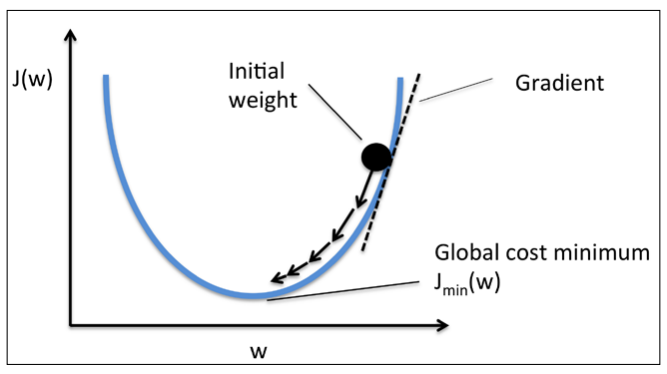

최소 지점으로 가기 위해 그레디언트 값은 다음과 같은 식으로 업데이트 한다.
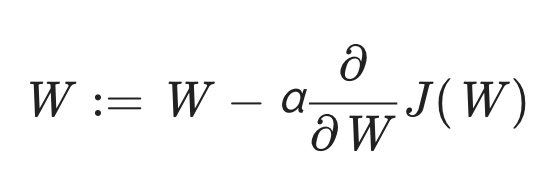

- 여기서 \alpha에 해당하는 값이 **learning rate** 라는 것이다.

learning rate가 너무 크면 최적의 W 값을 건너 뛰게 되어 수렴하지 못하고, 너무 작으면 학습에 시간이 오래걸리게 된다.

## 16-3. 로지스틱 회귀분석(Logistic Regression)
**로지스틱 회귀분석(Logistic Regression)**이란 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측하고 그 확률에 따라 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘이다.

**이진 분류(binary classfication) 문제**를 풀 때 로지스틱 회귀분석을 많이 사용한다.

- [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8&t=373s&ab_channel=StatQuestwithJoshStarmer)
- [Logistic Regression Details Pt1: Coefficients](https://www.youtube.com/watch?v=vN5cNN2-HWE&ab_channel=StatQuestwithJoshStarmer)

### 1. 정의 및 용어 설명
로지스틱 회귀식은 다음과 같이 나타낼 수 있다. 만일 종속변수가 0일 확률을 $P(y=0 | x)라고 한다면 이를 구하는 식은 다음과 같다.
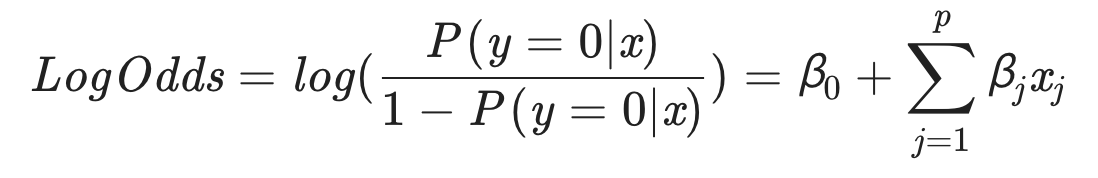



Odds라는 개념은 사건이 발생할 확률을 발생하지 않을 확률로 나눈 값이다. 

유방암 데이터셋을 예를 들면 악성 종양일 확률이 0.2이고, 양성 종양일 확률이 0.8이라 하면 Odds는 0.2 / 0.8 = 0.25가 된다.

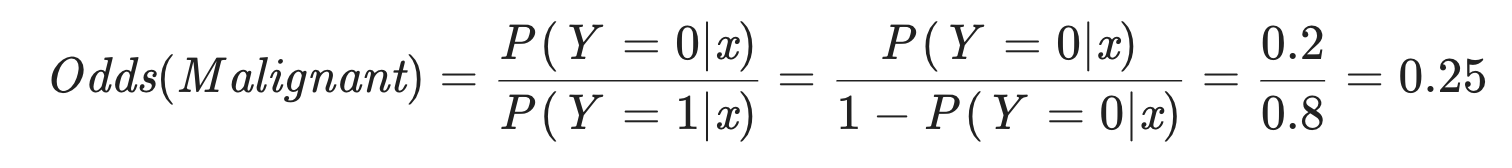

위 값에 log를 취한 값을 Log-odds라고 부른다. 그런데 이 Log-odds의 형식이 맨 청므 나온 좌변의 식과 같다. 결국 이 log-odds라는 값을 선형회귀분석의 종속변수처럼 구하면 된다.



위와 같은 식에 주어진 데이터를 이용하면, 주어진 데이터를 잘 설명하는 회귀계수($\beta$)를 구할 수 있다. 이렇게 로지스틱 회귀모델이 구성되는데, 이 회귀모델은 수식적으로 볼 때 Log-odds의 선형 회귀모델이라고 할 수도 있다.

그런데 실제로 우리가 원하는 값은 log-odds의 값이 아니다. 우리는 종속 변수가 0일 확률, 1일 확률 자체를 구하는 것이지 log-odds 자체의 값이 필요하지 않다. 그래서 log-odds로부터 특정 범주에 속할 확률을 얻기 위해 log-odds의 식을 $P(Y=0 | x)$에 대해 다시 정리하게 되면 다음과 같다.

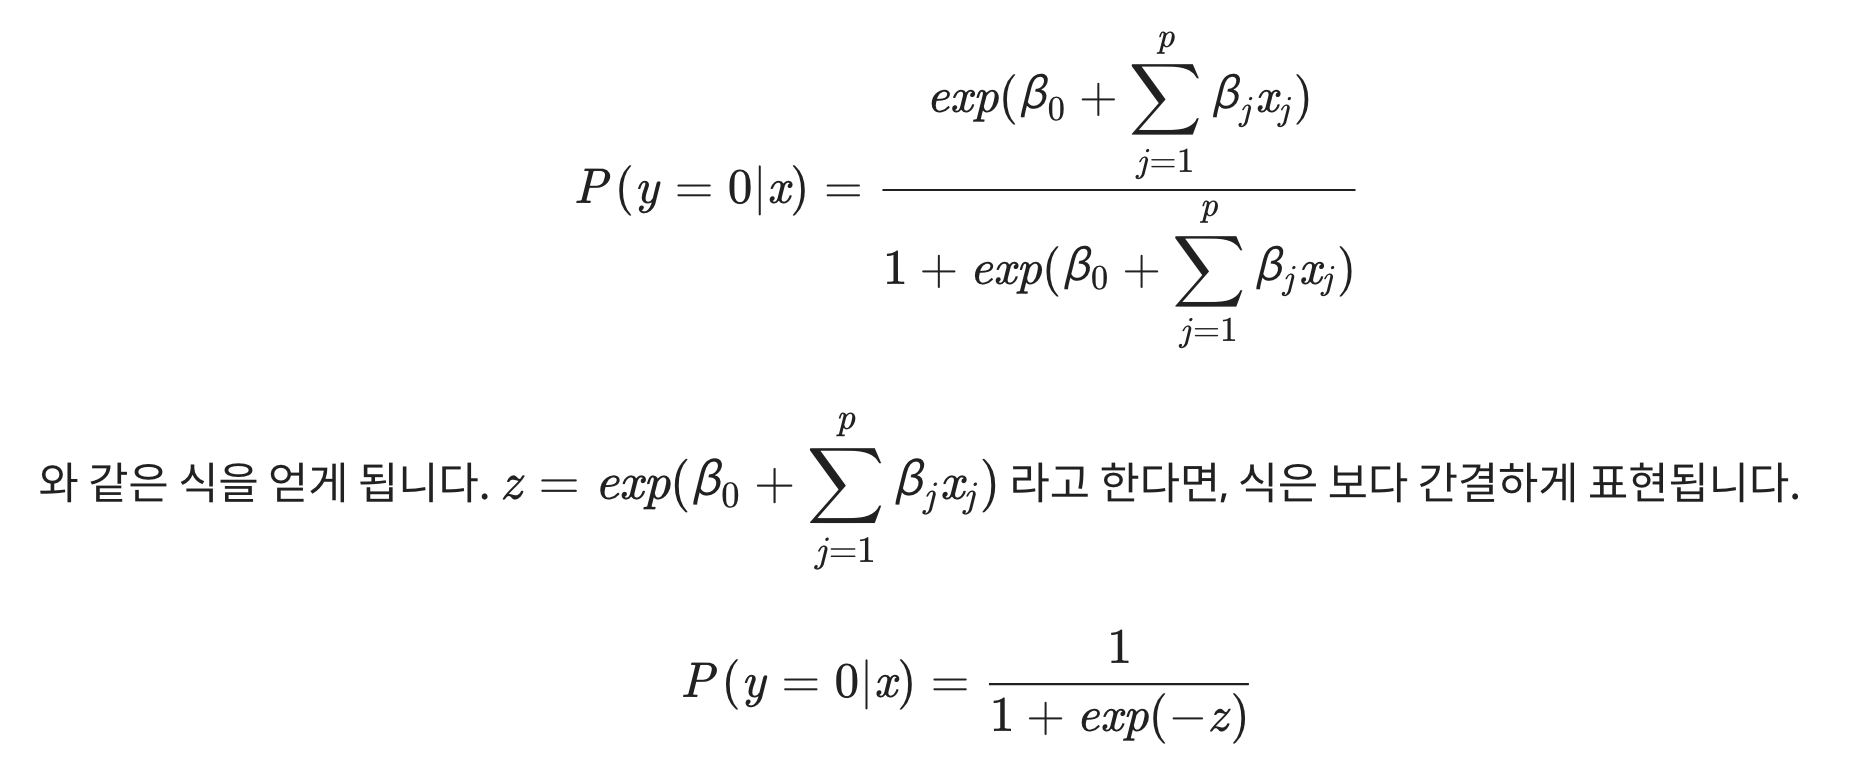

### Sigmoid Function
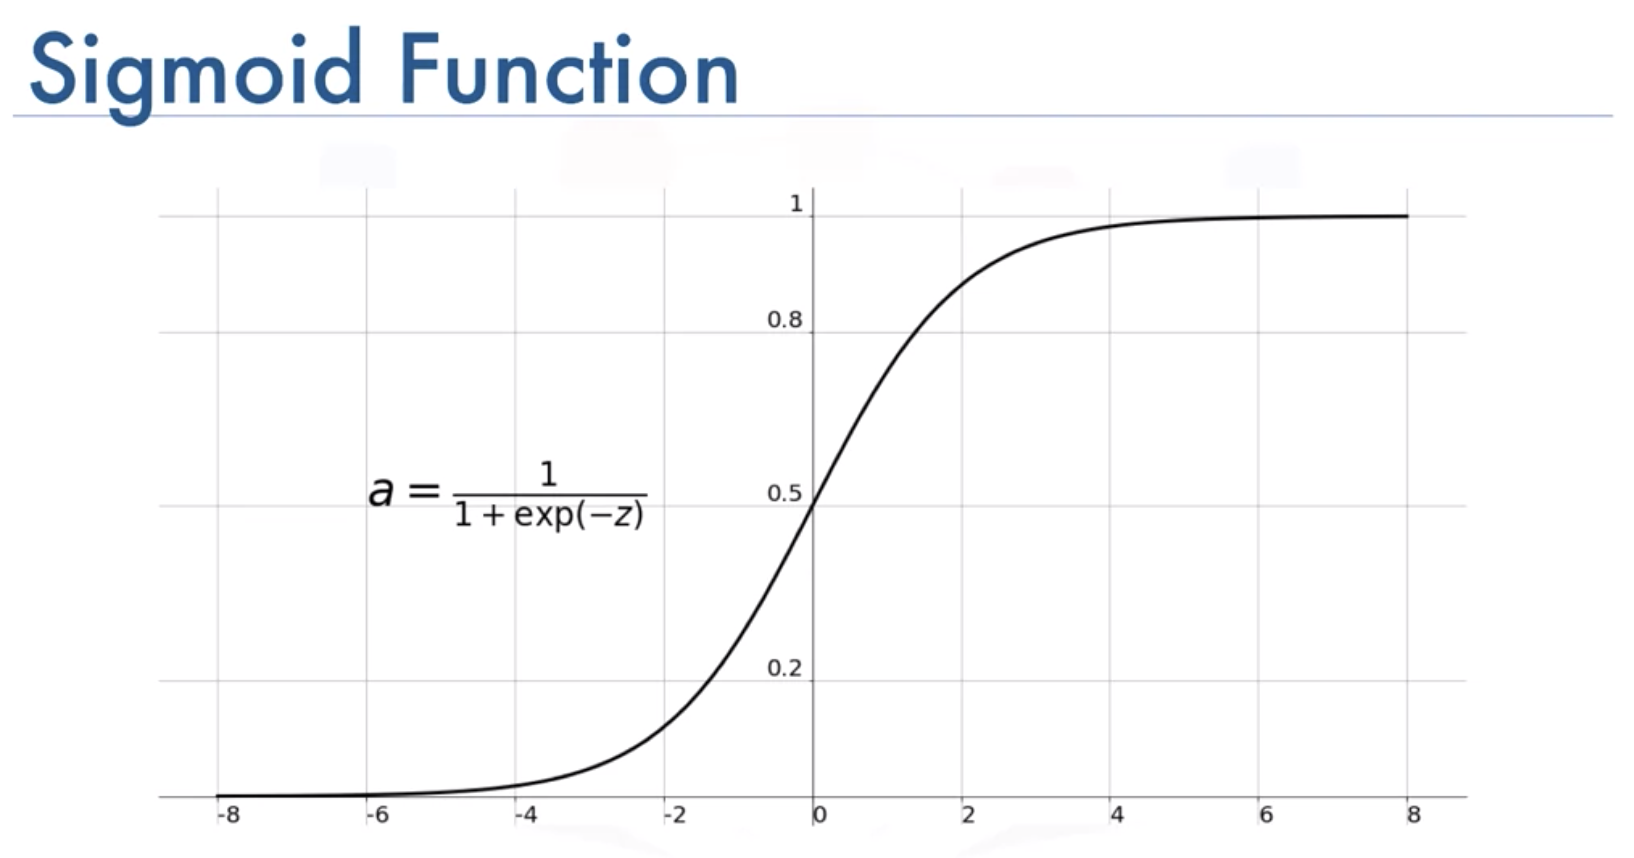

결국 Log-odds 값을 구한 다음, 이를 sigmoid function에 넣어서 0에서 1 사이의 값으로 변환해주는 것이다.

이 함수는 확률 모델을 선형 회귀모델로 표현한 것이 아니라, 위 그래프에서 $z=0$인 지점을 중심으로 하여 두 범주 간 경계까 불명확해지는 $x$의 구간($0.3 < p < 0.7$)을 최소화해주기 때문에 분류 모델의 분류 성능을 매우 향상시켜준다.

정리하면 로지스틱 회귀에서는 데이터가 특정 범주에 속할 확률을 예측하기 위해 아래와 같은 단계를 거친다.
1. 실제 데이터를 대입하여 Odds 및 회귀계수를 구한다.
2. Log-odds를 계산한 후, 이를 sigmoid function의 입력으로 넣어서 특정 범주에 속할 확률 값을 계산한다.
3. 설정한 threshold에 맞추어 설정값 이상이면 1, 이하면 0으로 이진 분류를 수행한다.

### 2. 데이터 개요


In [5]:
# 로지스틱 회귀분석 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3. 로지스틱 회귀분석 예제

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 로지스틱 회귀는 회귀 모델일까? 분류 모델일까?
결론부터 말하면 로지스틱 회귀는 회귀모델이 맞다.

하지만 회귀모델인 로지스틱 회귀를 분류 문제에 사용하는 것이다. 회귀모델로서 로지스틱 회귀는 $x$가 속할 범주별 확률 값을 계산하는 것까지이고, 이후 $argmax$ 등을 이용해 이 확률 값이 최대가 되는 범주를 골라 $x$가 어떤 범주에 속하는지 예측하는 것은 로지스틱 회귀모델을 활용하는 응용 과정이다.

## 16-4. Softmax 함수와 Cross Entropy



### 1. Softmax 함수
로지스틱 회귀는 이진분류 뿐만 아니라 여러 범주로 분류하는 **다중 로지스틱 회귀(Multinomial Logistic Regression)**으로 확장될 수 있다.

이때 시그모이드 함수는 여러 범주로 분류하는 함수 **Softmax 함수**로 확장되어야 한다.

**Softmax** 함수는 **2가지가 아닌 여러 범주로 분류하는 함수**이다. Multi class classfication에 적합한 함수라고 볼 수 있다.
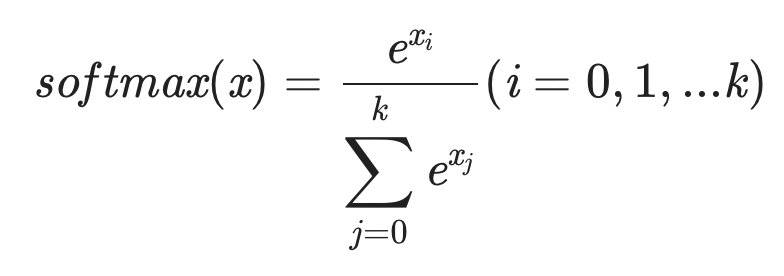

각 범주의 확률 값이 0에서 1 사이의 값이고, 또 하나의 특징은 모든 범주에 해당하는 softmax의 값을 전부 더했을 때 확률 값이 1이 된다는 점이다.

또한 softmax 함수는 큰 log-odds와 작은 log-odds의 차이를 극대화시켜준다. 

그렇기 떄문에 마지막에 softmax 함수에 모든 범주의 log-odds를 통과시키면 해당 데이터가 어떤 범주로 분류되는지 확실히 알 수 있게 되는데, 가장 큰 값을 1, 그 외 나머지 값들을 0으로 인코딩하는 one-hot encoding을 통해 표현된다.

### 2. Cross Entropy
**Cross Entropy** 함수는 **softmax 함수의 손실함수**로 쓰인다.
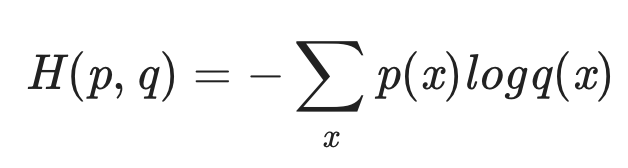

이 역시 손실함수이기 떄문에 가중치가 최적화될수록 `H(p, q)`의 값이 감소하게 되는 방향으로 가중치 학습이 된다. 그리고 `p(x)`는 실제 데이터의 범주 값, `q(x)`는 softmax의 결과값을 대입하게 된다.

- [왜 크로스 엔트로피를 쓸까?](https://theeluwin.postype.com/post/6080524)
- [Cross-entropy 의 이해: 정보이론과의 관계](https://3months.tistory.com/436)

### 3. 유방암 데이터셋을 이용한 softmax 및 cross entropy 예제

In [7]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.compat.v1.disable_eager_execution()

x = tf.placeholder(tf.float32, [None, 30]) # 30개의 attribute를 가진 유방암 데이터셋
y = tf.placeholder(tf.float32, [None, 2]) # 악성, 양성 label에 one-hot encoding을 적용하여 2차원이 될 예정 
num_classes = 2 # 악성, 양성
lr = 0.0003 # learning rate

W = tf.Variable(tf.random_normal([30, num_classes]), name='weight') # 가중치
b = tf.Variable(tf.random_normal([num_classes]), name='bias') # bias

logits = tf.matmul(x, W) + b # log-odds에 해당되는 값
hypothesis = tf.nn.softmax(logits) # log-odds에 softmax 적용한 값

loss_i = tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=y) # i번째 변수의 p(x)*log(q(x))
loss = tf.reduce_mean(loss_i) # 이를 모두 summation한 최종 loss function

#최적화함수로 gradient descent method 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

pred = tf.argmax(hypothesis, 1) # hypothesis의 결과 큰 값을 1, 작은 값을 0으로 매핑
correct_pred = tf.equal(pred, tf.argmax(y, 1)) # 예측값과 ground truth 값을 비교해서 같으면 True, 다르면 False
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) # True는 1, False는 0이 되기 때문에 전체 평균값이 결국 accuracy가 됩니다.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Tensorflow의 전역 변수 초기화
    one_hot_train_y = np.eye(num_classes)[train_y] # one-hot encoding을 수행한 train data 라벨
    one_hot_test_y = np.eye(num_classes)[test_y] # one-hot encoding을 수행한 test data 라벨
    
    # 전체 train data를 1000번 iteration
    for step in range(1000):
        sess.run(optimizer, feed_dict={x: train_X, y: one_hot_train_y}) # train data로 학습
        test_loss, test_acc= sess.run([loss, accuracy], feed_dict={x: test_X, y: one_hot_test_y}) #학습된 모델을 통해 측정한 test data의 loss 값 및 정확도
        if step % 10 == 0: # 10번째 step마다 print 수행
            print("Step {}, loss: {:.3f} accuracy: {:.3f}".format(
            step, 
            test_loss,
            test_acc
            ))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 0, loss: 546.001 accuracy: 0.632
Step 10, loss: 127.302 accuracy: 0.175
Step 20, loss: 106.096 accuracy: 0.211
Step 30, loss: 86.372 accuracy: 0.211
Step 40, loss: 71.027 accuracy: 0.281
Step 50, loss: 119.782 accuracy: 0.368
Step 60, loss: 123.921 accuracy: 0.368
Step 70, loss: 73.955 accuracy: 0.386
Step 80, loss: 129.607 accuracy: 0.368
Step 90, loss: 66.427 accuracy: 0.386
Step 100, loss: 116.221 accuracy: 0.368
Step 110, loss: 74.187 accuracy: 0.386
Step 120, loss: 99.822 accuracy: 0.368
Step 130, loss: 83.131 accuracy: 0.368
Step 140, loss: 80.256 accuracy: 0.368
Step 150, loss: 76.982 accuracy: 0.368
Step 160, loss: 67.123 accuracy: 0.386
Step 170, loss: 62.054 accuracy: 0.386
Step 180, loss: 56.379 accuracy: 0.386
Step 190, loss: 53.272 accuracy: 0.386
Step 200, loss: 48.772 accuracy: 

- Tensorflow V1에서는 with tf.Session() 위쪽에 있는 모델 선언부와 with tf.Session()문 안에 있는 실행부로 코드가 크게 나뉩니다. 그래서 모든 코드의 실제 수행은 sess.run() 안에서만 진행된다는 특징이 있습니다.

In [8]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()
model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax', input_shape=(30,)))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Train on 512 samples
Epoch 1/20
512/512 [==============================] - 0s 216us/sample - loss: 171.6713 - accuracy: 0.6270
Epoch 2/20
512/512 [==============================] - 0s 83us/sample - loss: 138.5028 - accuracy: 0.6270
Epoch 3/20
512/512 [==============================] - 0s 73us/sample - loss: 104.4852 - accuracy: 0.6270
Epoch 4/20
512/512 [==============================] - 0s 81us/sample - loss: 72.1720 - accuracy: 0.6230
Epoch 5/20
512/512 [==============================] - 0s 69us/sample - loss: 45.8385 - accuracy: 0.3145
Epoch 6/20
512/512 [==============================] - 0s 72us/sample - loss: 37.9119 - accuracy: 0.1309
Epoch

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


- 우리가 딥러닝 모델을 구현하는 과정도 로지스틱 회귀를 구현하는 것과 매우 유사합니다. 로지스틱 회귀가 그러했던 것처럼, 우리는 분류모델이 Softmax를 통해 범주별 확률 예측값을 만들게 하고 이것을 최대로 만드는 범주를 선택하는 방법을 써왔습니다. 단지, 분류모델을 설계할 때 위 코드처럼 Dense 레이어 하나만을 사용하는 것이 아니라 레이어를 여러장 깊게 쌓는 방법을 써왔죠.

In [9]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 62        
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Train on 512 samples
Epoch 1/20
512/512 [==============================] - 0s 164us/sample - loss: 124.0171 - accuracy: 0.4980
Epoch 2/20
512/512 [==============================] - 0s 86us/sample - loss: 24.3964 - accuracy: 0.5039
Epoch 3/20
512/512 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


## 16-5. 정리 및 요약
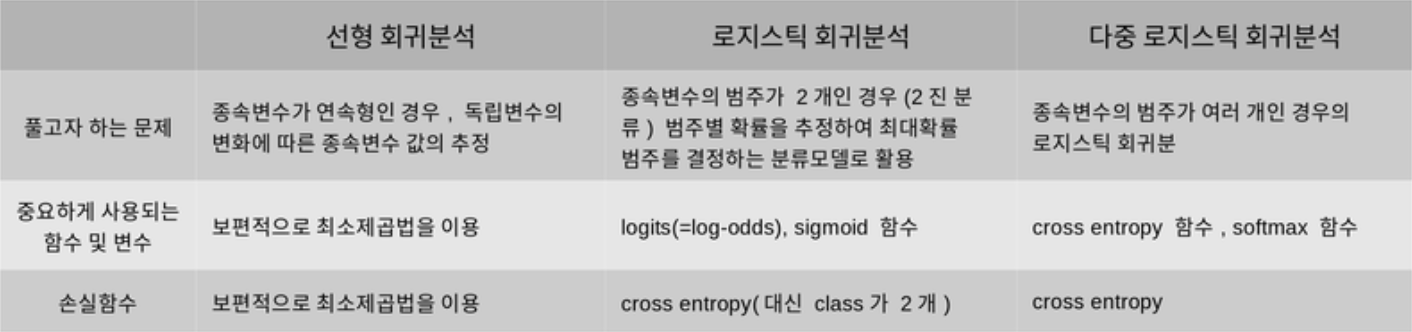